# Анализ поездок в такси. 

## Часть 0: обзор датафрейма и очистка данных.

**ВНИМАНИЕ! Код в данном файле во время исполнения считывает и записывает локальные данные.**

Цель: провести первичный осмотр данных о поездках в такси и очистить данные для последующего анализа.

Для достижения цели требуется выполнить ряд задач. Изложим их поэтапно:
1. Загрузить данные, провести их первичный осмотр.
1. Оценить количество и характер пропусков, проанализировать данные на избыточность и преобразовать формат атрибутов, где это требуется.
1. Определить, какие данные подлежат удалению из датафрейма, решить, как издавляться от пропусков. Произвести первичную очистку от заведомо плохих данных.
1. Провести анализ на наличие выбросов. Очистить данные от выбросов.
1. Сохранение результатов очистки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df_filename = './data/Taxi_Trips.zip'

df_clean_filename = './data/Taxi_Trips_Clean.zip'
df_dropped_filename = './data/Taxi_Trips_Dropped.zip'
df_outliers_filename = './data/Taxi_Trips_Outliers.zip'

### 1. Загрузка и осмотр данных

In [2]:
df = pd.read_csv(df_filename, compression='zip')

In [3]:
print('В датафрейме содержатся следующие признаки:', *df.columns, sep='\n')

В датафрейме содержатся следующие признаки:
Trip ID
Taxi ID
Trip Start Timestamp
Trip End Timestamp
Trip Seconds
Trip Miles
Pickup Census Tract
Dropoff Census Tract
Pickup Community Area
Dropoff Community Area
Fare
Tips
Tolls
Extras
Trip Total
Payment Type
Company
Pickup Centroid Latitude
Pickup Centroid Longitude
Pickup Centroid Location
Dropoff Centroid Latitude
Dropoff Centroid Longitude
Dropoff Centroid  Location


In [4]:
df.sample(2)

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
847927,935d4cd7c9f4b5192b9e38cd17559f052fb70882,64f59b7a01c1221ff4d8b829f37f54b6f6151a394c8733...,01/02/2024 03:45:00 PM,01/02/2024 04:15:00 PM,1071.0,10.51,NaN,NaN,76.0,21.0,...,5.0,32.25,Cash,Taxicab Insurance Agency Llc,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.938666,-87.711211,POINT (-87.7112105933 41.9386661962)
638770,bbb166831d7ef5a0ecaac60be999a11538a155aa,ec56c095d0e5b779d527c06e9551ccb27b04c70e1b8d8e...,01/18/2024 08:45:00 PM,01/18/2024 08:45:00 PM,360.0,1.00,1.703132e+10,1.703128e+10,32.0,28.0,...,1.0,7.25,Cash,Chicago Independents,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.879255,-87.642649,POINT (-87.642648998 41.8792550844)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865247 entries, 0 to 865246
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     865247 non-null  object 
 1   Taxi ID                     865246 non-null  object 
 2   Trip Start Timestamp        865247 non-null  object 
 3   Trip End Timestamp          865239 non-null  object 
 4   Trip Seconds                865078 non-null  float64
 5   Trip Miles                  865241 non-null  float64
 6   Pickup Census Tract         327251 non-null  float64
 7   Dropoff Census Tract        313854 non-null  float64
 8   Pickup Community Area       842052 non-null  float64
 9   Dropoff Community Area      781394 non-null  float64
 10  Fare                        863202 non-null  float64
 11  Tips                        863202 non-null  float64
 12  Tolls                       863202 non-null  float64
 13  Extras        

### 2. Преобразование форматов и невалидные данные.

Преобразуем данные о времени и дате и найдем записи, в которых содержится заведомо ложные данные (отрицательные стоимости поездок и т.д.).

In [6]:
df[(df['Trip Start Timestamp'].isna() | (df['Trip End Timestamp'].isna()))]

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
98746,c835d0484cd335bcdf726a0c48f21c3fb83205bf,3b9219b7e9fcda0db2edcc2219b876b709d073b7e7a223...,02/23/2024 07:30:00 PM,NaN,NaN,0.0,1.703108e+10,NaN,8.0,NaN,...,0.0,0.0,Unknown,U Taxicab,41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),NaN,NaN,NaN
328577,455ff5f8ea68d25b0a6833c8b32bffc9e60c8bd6,25f9e3181a63c662d369fc9af22a1a60436e6896a3d4fe...,02/08/2024 05:00:00 PM,NaN,NaN,0.0,1.703184e+10,NaN,32.0,NaN,...,0.0,0.0,Unknown,"Taxicab Insurance Agency, LLC",41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),NaN,NaN,NaN
350856,9c58d50ba28400cfa0c1d5c34fed6da03796a0e7,9ff81eeb8fa79b5e37af20fb6a6d52d6bfed9edecd4e66...,02/07/2024 11:15:00 AM,NaN,NaN,0.0,NaN,NaN,16.0,NaN,...,0.0,0.0,Unknown,Taxi Affiliation Services,41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),NaN,NaN,NaN
379340,59f347dfe689c704f1f6b84800f297edfcd4ca8c,b2949139bf976ce9b80d79cfc2acd4889a2e5939dae444...,02/05/2024 02:15:00 PM,NaN,NaN,0.0,NaN,NaN,16.0,NaN,...,0.0,0.0,Unknown,Taxi Affiliation Services,41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),NaN,NaN,NaN
658232,5931551a6c0661f3f5aca77236b9c022b717907b,e01e870c967429b39b2c07110796c52acfad70e96fd2b9...,01/17/2024 05:30:00 PM,NaN,NaN,0.0,1.703108e+10,NaN,8.0,NaN,...,0.0,0.0,Unknown,Taxi Affiliation Services,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),NaN,NaN,NaN
810111,7bbfa61df60e40a95ac7423fac98e18ca37ae73a,b625c2cbc319431ecc66ecfffe5d585074395c6a27532e...,01/05/2024 01:30:00 PM,NaN,NaN,0.0,NaN,NaN,19.0,NaN,...,0.0,0.0,Unknown,Taxi Affiliation Services,41.927261,-87.765502,POINT (-87.7655016086 41.9272609555),NaN,NaN,NaN
843572,b8ac9919873e250dc0d6a90ddccf0ceb30bd86c3,07f3ce687dce8fa4518b83cd63bfbfb0383339fd188b5b...,01/02/2024 09:45:00 PM,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,Unknown,Taxi Affiliation Services,NaN,NaN,NaN,NaN,NaN,NaN
848552,94176a923be88430bab1585d0348fc9b48252d88,fdd5ae66de73dcf0baaf4a768c182b0c9e0579643672c0...,01/02/2024 03:15:00 PM,NaN,NaN,0.0,1.703116e+10,NaN,16.0,NaN,...,0.0,0.0,Unknown,Taxi Affiliation Services,41.949876,-87.738142,POINT (-87.7381418906 41.9498764323),NaN,NaN,NaN


Найдено 8 записей с пропусками в Trip End Timestamp. У них стоимость оплаты $0 и неизвестный способ оплаты. Отбросим эти записи.

In [7]:
df_dropped = df[df['Trip End Timestamp'].isna()]
df_clean = df[~df['Trip End Timestamp'].isna()]

Преобразуем информацию о времени в формат datetime.

In [8]:
from datetime import datetime

for feature in [f'Trip {s} Timestamp' for s in ['Start', 'End']]:
    df_clean[feature] = df_clean[feature].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))

/tmp/ipykernel_151169/3479570775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[feature] = df_clean[feature].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))


In [9]:
df_clean[['Trip Start Timestamp', 'Trip End Timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 865239 entries, 0 to 865246
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Trip Start Timestamp  865239 non-null  datetime64[ns]
 1   Trip End Timestamp    865239 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 19.8 MB


Посмотрим на доли пропусков в признаках:

In [10]:
for feature in df.columns:
    print(f'Доля пропусков в {feature}: {100 * df_clean[feature].isna().sum() / df.shape[0]:.2f} %.')

Доля пропусков в Trip ID: 0.00 %.
Доля пропусков в Taxi ID: 0.00 %.
Доля пропусков в Trip Start Timestamp: 0.00 %.
Доля пропусков в Trip End Timestamp: 0.00 %.
Доля пропусков в Trip Seconds: 0.02 %.
Доля пропусков в Trip Miles: 0.00 %.
Доля пропусков в Pickup Census Tract: 62.18 %.
Доля пропусков в Dropoff Census Tract: 63.73 %.
Доля пропусков в Pickup Community Area: 2.68 %.
Доля пропусков в Dropoff Community Area: 9.69 %.
Доля пропусков в Fare: 0.24 %.
Доля пропусков в Tips: 0.24 %.
Доля пропусков в Tolls: 0.24 %.
Доля пропусков в Extras: 0.24 %.
Доля пропусков в Trip Total: 0.24 %.
Доля пропусков в Payment Type: 0.00 %.
Доля пропусков в Company: 0.00 %.
Доля пропусков в Pickup Centroid Latitude: 2.65 %.
Доля пропусков в Pickup Centroid Longitude: 2.65 %.
Доля пропусков в Pickup Centroid Location: 2.65 %.
Доля пропусков в Dropoff Centroid Latitude: 9.21 %.
Доля пропусков в Dropoff Centroid Longitude: 9.21 %.
Доля пропусков в Dropoff Centroid  Location: 9.21 %.


В признаках с указанием Census Tract содержится очень много пропусков. Придется отбросить их из рассмотрения.
Проверим, сколько записей объединяют пропуски в остальных данных.

In [11]:
features = [feature for feature in df_clean.columns if feature not in ['Pickup Census Tract', 'Dropoff Census Tract']] 

print(f'Доля суммарных пропусков: {100 * df_clean[df_clean[features].isna().any(axis='columns')].shape[0] / df_clean.shape[0]:.2f}%.')


Доля суммарных пропусков: 10.57%.


Таким числом можно пренебречь и отбросить данные с пропусками.

In [12]:
df_dropped = pd.concat([df_dropped, df_clean[df[features].isna().any(axis='columns')]])
df_clean = df_clean[~df_clean[features].isna().any(axis='columns')]

/tmp/ipykernel_151169/158349556.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dropped = pd.concat([df_dropped, df_clean[df[features].isna().any(axis='columns')]])
/tmp/ipykernel_151169/158349556.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_dropped = pd.concat([df_dropped, df_clean[df[features].isna().any(axis='columns')]])


In [13]:
df_clean.isna().sum()

Trip ID                            0
Taxi ID                            0
Trip Start Timestamp               0
Trip End Timestamp                 0
Trip Seconds                       0
Trip Miles                         0
Pickup Census Tract           466569
Dropoff Census Tract          466569
Pickup Community Area              0
Dropoff Community Area             0
Fare                               0
Tips                               0
Tolls                              0
Extras                             0
Trip Total                         0
Payment Type                       0
Company                            0
Pickup Centroid Latitude           0
Pickup Centroid Longitude          0
Pickup Centroid Location           0
Dropoff Centroid Latitude          0
Dropoff Centroid Longitude         0
Dropoff Centroid  Location         0
dtype: int64

Теперь выбросим  Pickup Census Tract и Dropoff Census Tract.

In [14]:
df_clean = df_clean[features]

Признаки Pickup Centroid Location и Dropoff Centroid Location дублируют информацию, представленную в признаках с широтой и долготой по отдельности. Их тоже можно отбросить.

In [15]:
df_clean = df_clean[[column for column in df_clean.columns if column not in ['Pickup Centroid Location', 'Dropoff Centroid  Location']]]

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 773804 entries, 0 to 865246
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Trip ID                     773804 non-null  object        
 1   Taxi ID                     773804 non-null  object        
 2   Trip Start Timestamp        773804 non-null  datetime64[ns]
 3   Trip End Timestamp          773804 non-null  datetime64[ns]
 4   Trip Seconds                773804 non-null  float64       
 5   Trip Miles                  773804 non-null  float64       
 6   Pickup Community Area       773804 non-null  float64       
 7   Dropoff Community Area      773804 non-null  float64       
 8   Fare                        773804 non-null  float64       
 9   Tips                        773804 non-null  float64       
 10  Tolls                       773804 non-null  float64       
 11  Extras                      773804 non-null 

In [17]:
df_clean.describe()

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,773804,773804,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000
mean,2024-02-01 14:20:49.651332864,2024-02-01 14:39:22.138862336,1110.811221,6.084376,34.433178,25.768254,20.636600,2.577278,0.050371,1.307490,24.744691,41.898875,-87.693469,41.891662,-87.658097
min,2024-01-01 00:00:00,2024-01-01 00:00:00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.650222,-87.913625
25%,2024-01-18 14:30:00,2024-01-18 14:45:00,443.000000,0.900000,8.000000,8.000000,7.750000,0.000000,0.000000,0.000000,9.750000,41.878866,-87.699155,41.878866,-87.663518
50%,2024-02-01 14:30:00,2024-02-01 15:00:00,853.000000,2.620000,32.000000,28.000000,13.920000,0.010000,0.000000,0.000000,16.500000,41.893216,-87.642498,41.892508,-87.633308
75%,2024-02-16 12:30:00,2024-02-16 12:45:00,1548.000000,11.250000,56.000000,32.000000,32.250000,3.650000,0.000000,1.000000,35.800000,41.953582,-87.625192,41.922686,-87.625192
max,2024-03-01 00:00:00,2024-03-01 14:30:00,86340.000000,3093.470000,77.000000,77.000000,9999.750000,200.000000,4444.440000,5051.100000,9999.750000,42.021224,-87.534903,42.021224,-87.534903
std,NaN,NaN,1462.267015,7.486245,25.465230,20.433198,20.497516,3.747523,13.634970,18.829252,37.905415,0.064426,0.108441,0.059012,0.065795


На этом можно завершить первый этап очистки. Дальше нужно проверить данные на наличие статистических выбросов.

### 2. Очистка от выбросов

Сначала построим распределения числовых признаков. Признаки datetime пока что считаем без выбросов -- поездка может начаться и закончиться в любой момент. Продолжительность поездки же вынесена в отдельный признак.

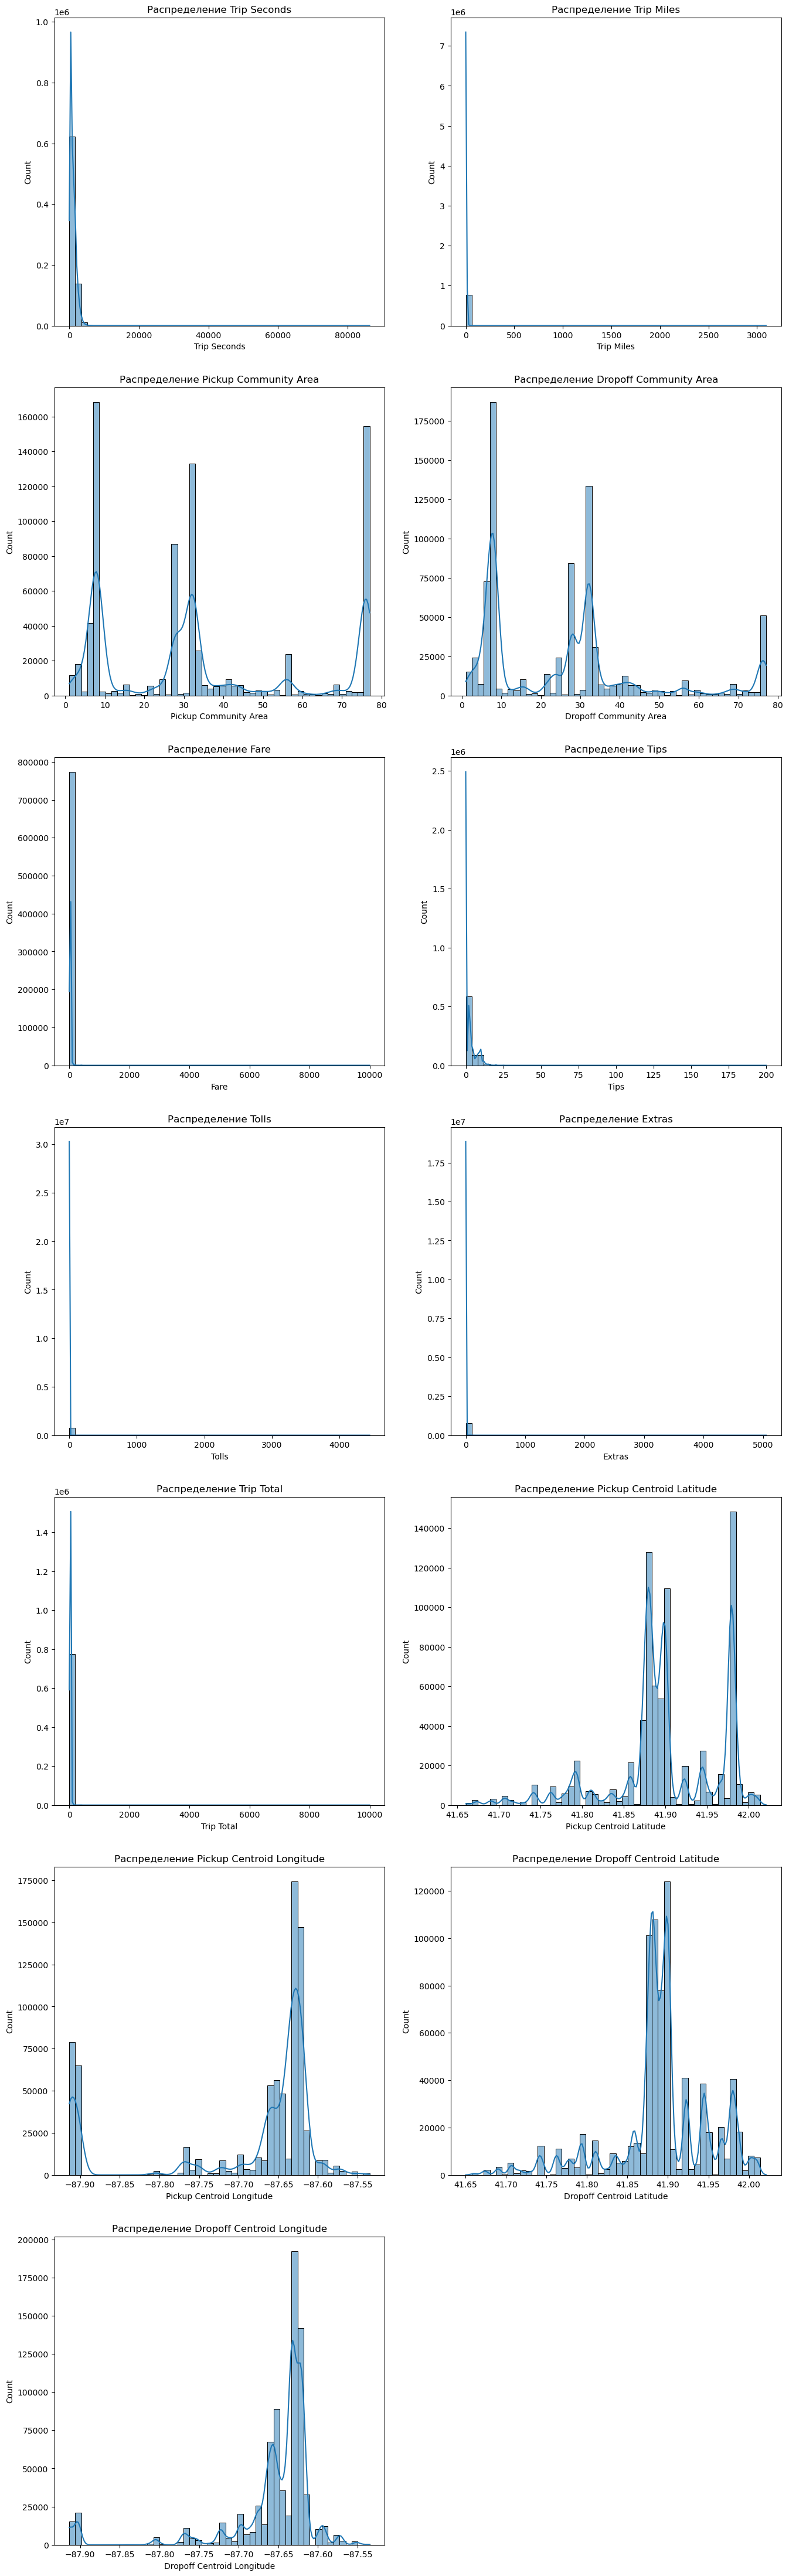

In [18]:
features = df_clean.select_dtypes(include=['float', 'int']).columns

ncols = 2
nrows = len(features) // ncols + bool(len(features) % ncols)

plt.figure(figsize=(8 * ncols, 8 * nrows))

for id, feature in enumerate(features):
    plt.subplot(nrows, ncols, id + 1)
    sns.histplot(df_clean[feature], bins=50, kde=True)
    plt.title(f'Распределение {feature}')

plt.show()


Полученные распределения являются сложными и многие из них мультимодальны. Для поиска выбросов не подойдут методы z-score и MAD, поэтому для поиска выбросов будем использовать метод межквартильного расстояния (IQR).

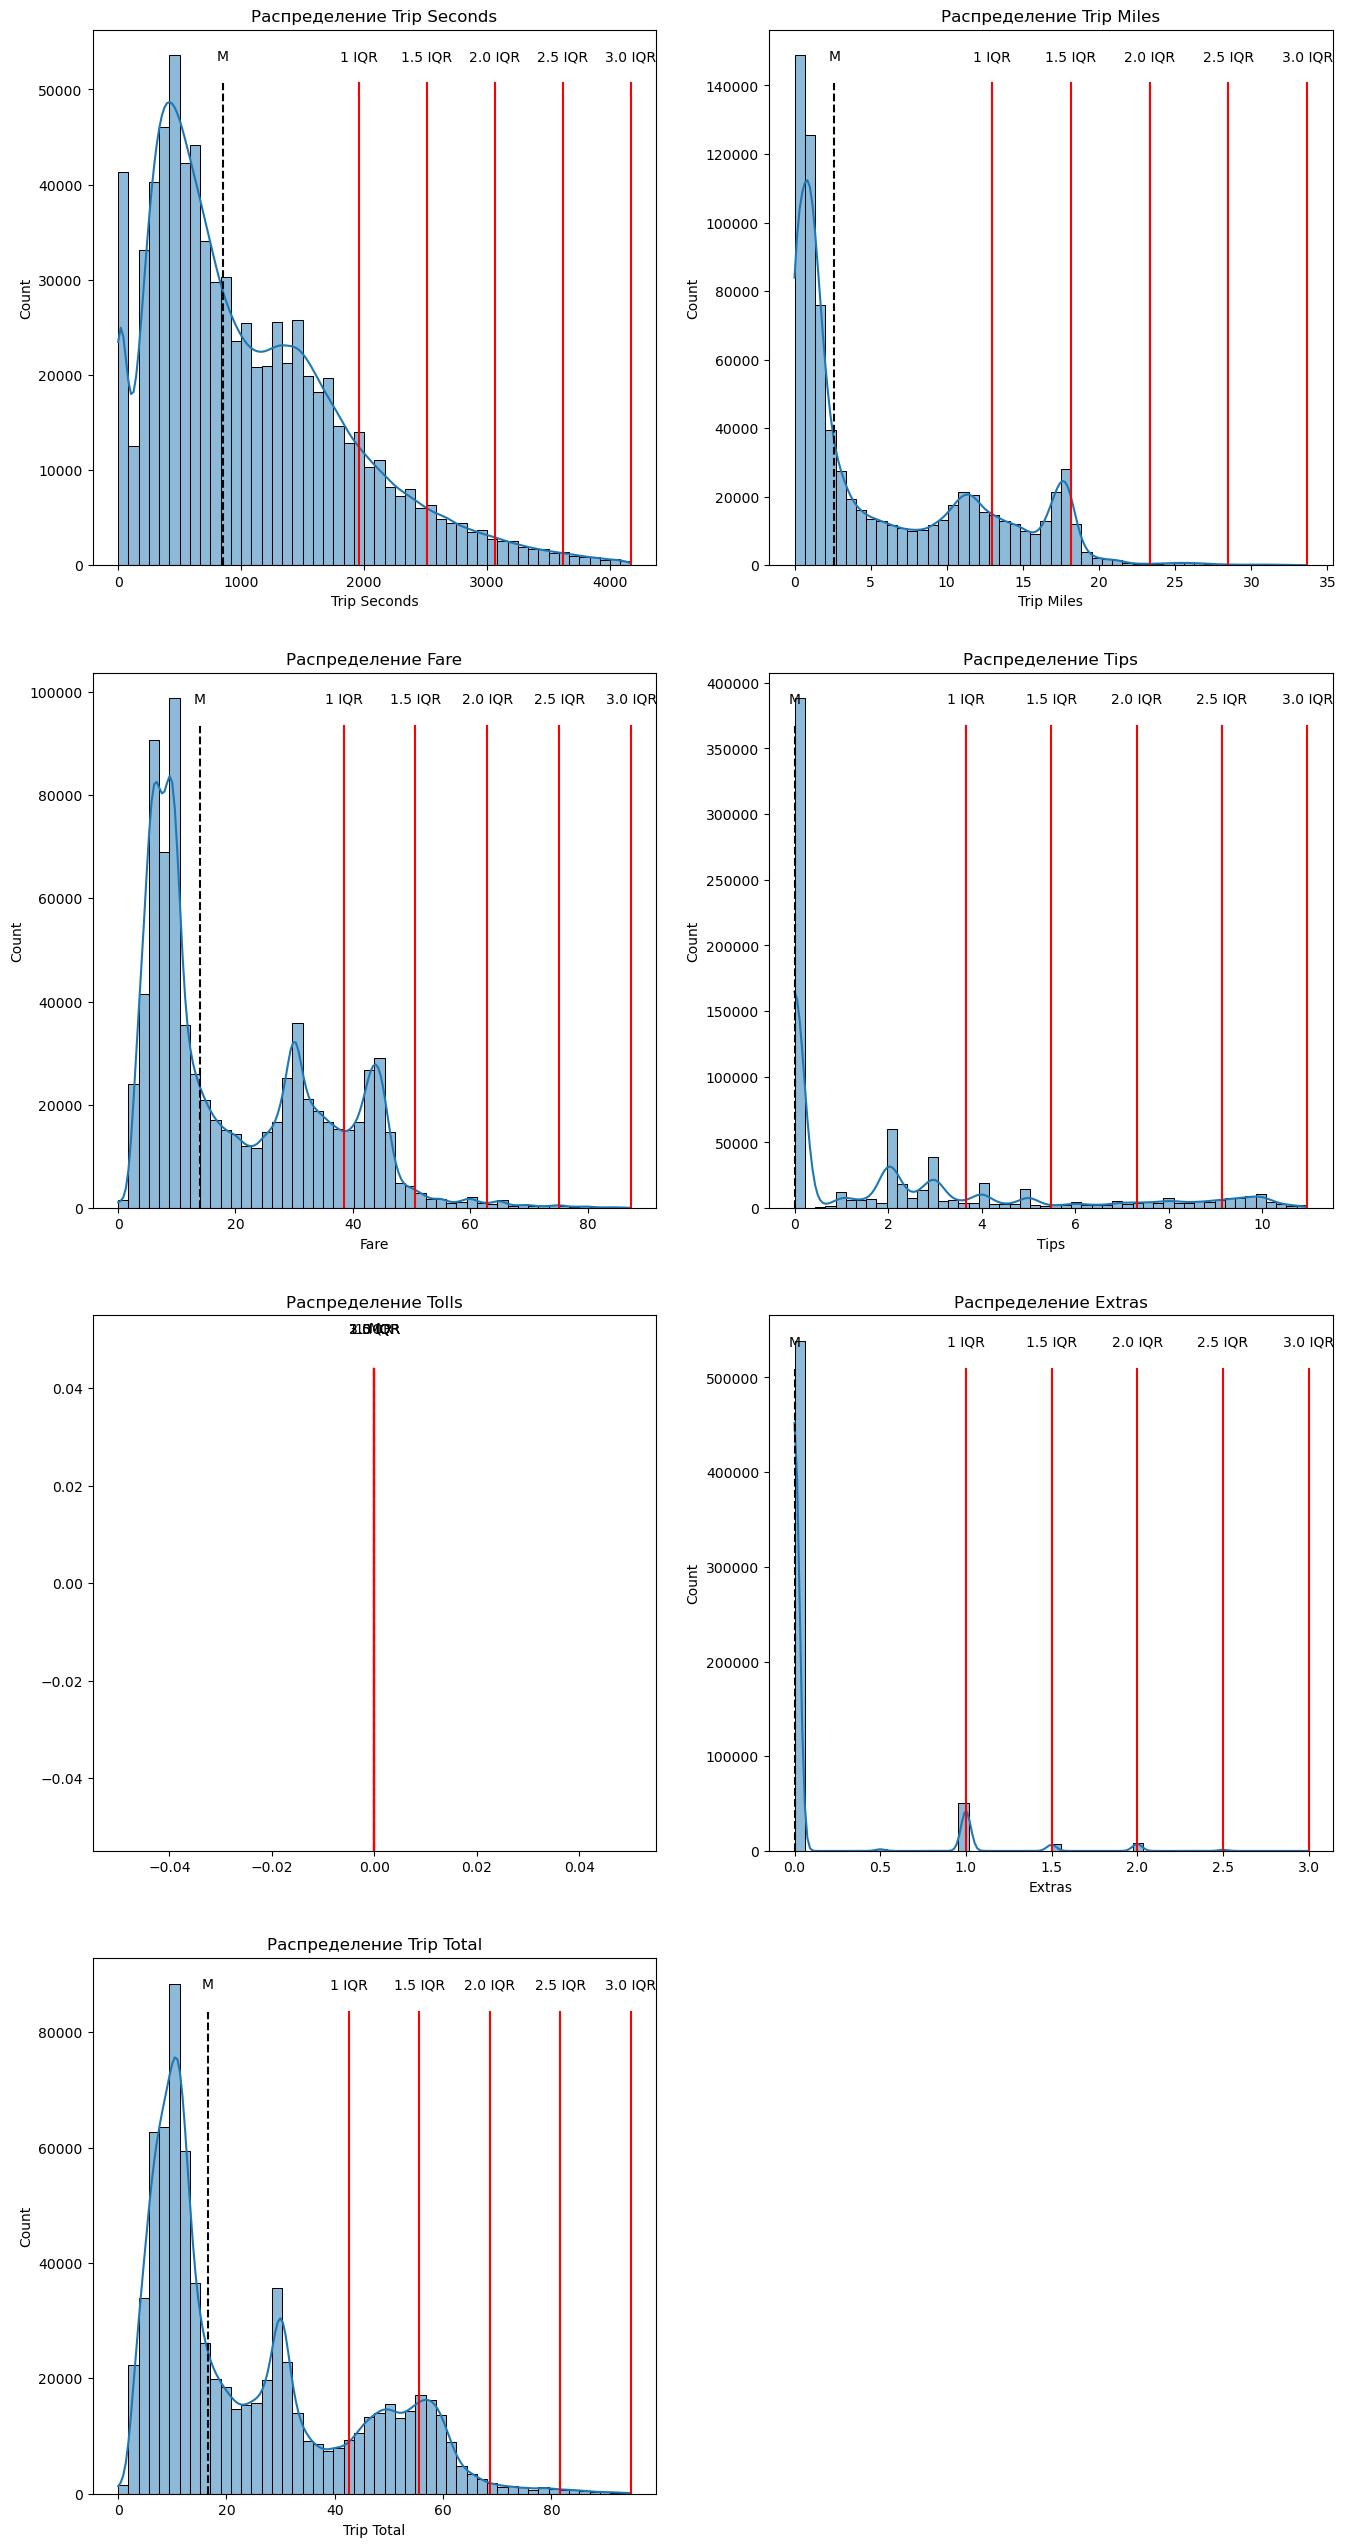

In [19]:
features = ['Trip Seconds', 'Trip Miles' , 'Fare',
            'Tips', 'Tolls', 'Extras', 'Trip Total']

medians = [df_clean[feature].median() for feature in features]
IQRs = [df_clean[feature].quantile(0.75)-df_clean[feature].quantile(0.25)
        for feature in features]

ncols = 2
nrows = len(features) // ncols + bool(len(features) % ncols)

plt.figure(figsize=(8 * ncols, 8 * nrows))

for id, f in enumerate(zip(features, medians, IQRs)):
    axes = plt.subplot(nrows, ncols, id+1)
    sns.histplot(df_clean[ (f[1] - 3 * f[2] < df_clean[f[0]]) & (df_clean[f[0]] < f[1] + 3 * f[2]) ][f[0]], bins=50, kde=True)

    plt.axvline(x=f[1], ymin=0, ymax=0.9, color='black', linestyle='--')
    plt.text(f[1], 0.95 * axes.get_ylim()[1], 'M', horizontalalignment='center', verticalalignment='center')

    for coeff in [1, 1.5, 2.0, 2.5, 3.0]:
        plt.axvline(x=f[1] + coeff * f[2], ymin=0, ymax=0.9, color='red', linestyle='-')
        plt.text(f[1] + coeff * f[2], 0.95 * axes.get_ylim()[1], f'{coeff} IQR', horizontalalignment='center', verticalalignment='center')

    plt.title(f'Распределение {f[0]}')

plt.show()

Посмотрим детально на признак Tolls:

In [20]:
df_clean['Tolls'].value_counts()

Tolls
0.00     772841
4.00        278
2.00        145
1.00         90
5.00         83
          ...  
46.00         1
6.60          1
15.00         1
22.00         1
16.75         1
Name: count, Length: 67, dtype: int64

Видно, что почти все значения лежат в пределах до $5. Применим это ограничение.

Для поиска выбросов применим индивидуальную ширину окна для каждого признака:
- Trip Seconds -- 2.5 IQR
- Trip Miles -- 1.75 IQR
- Fare -- 2.0 IQR
- Tips -- 2.75 IQR
- Tolls -- <= 5.0
- Extras -- 1.75 IQR
- Trip Total -- 2.0 IQR

Также наложим условие положительности на Trip Seconds, Trip Miles, Fare, Trip Total.

In [21]:
conditions = (df_clean['Trip Seconds'] < medians[0] + 2.5 * IQRs[0]) &\
    (0 < df_clean['Trip Seconds']) &\
    (df_clean['Trip Miles'] < medians[1] + 1.75 * IQRs[1]) &\
    (0 < df_clean['Trip Miles']) &\
    (df_clean['Fare'] < medians[2] + 2.0 * IQRs[2]) &\
    (0 < df['Fare']) &\
    (df_clean['Tips'] < medians[3] + 2.75 * IQRs[3]) &\
    (df_clean['Tolls'] <= 5) &\
    (df_clean['Extras'] < medians[5] + 1.75 * IQRs[5]) &\
    (df_clean['Trip Total'] < medians[6] + 2.0 * IQRs[6]) &\
    (0 < df_clean['Trip Total'])

/tmp/ipykernel_151169/1516032191.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(df_clean[conditions][feature], bins=50, kde=True)
/tmp/ipykernel_151169/1516032191.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(df_clean[conditions][feature], bins=50, kde=True)
/tmp/ipykernel_151169/1516032191.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(df_clean[conditions][feature], bins=50, kde=True)
/tmp/ipykernel_151169/1516032191.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(df_clean[conditions][feature], bins=50, kde=True)
/tmp/ipykernel_151169/1516032191.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(df_clean[conditions][feature], bins=50, kde=True)
/tmp/ipykernel_151169/1516032191.py:8: UserWarning: Boolean Series key will be reindexed to match Da

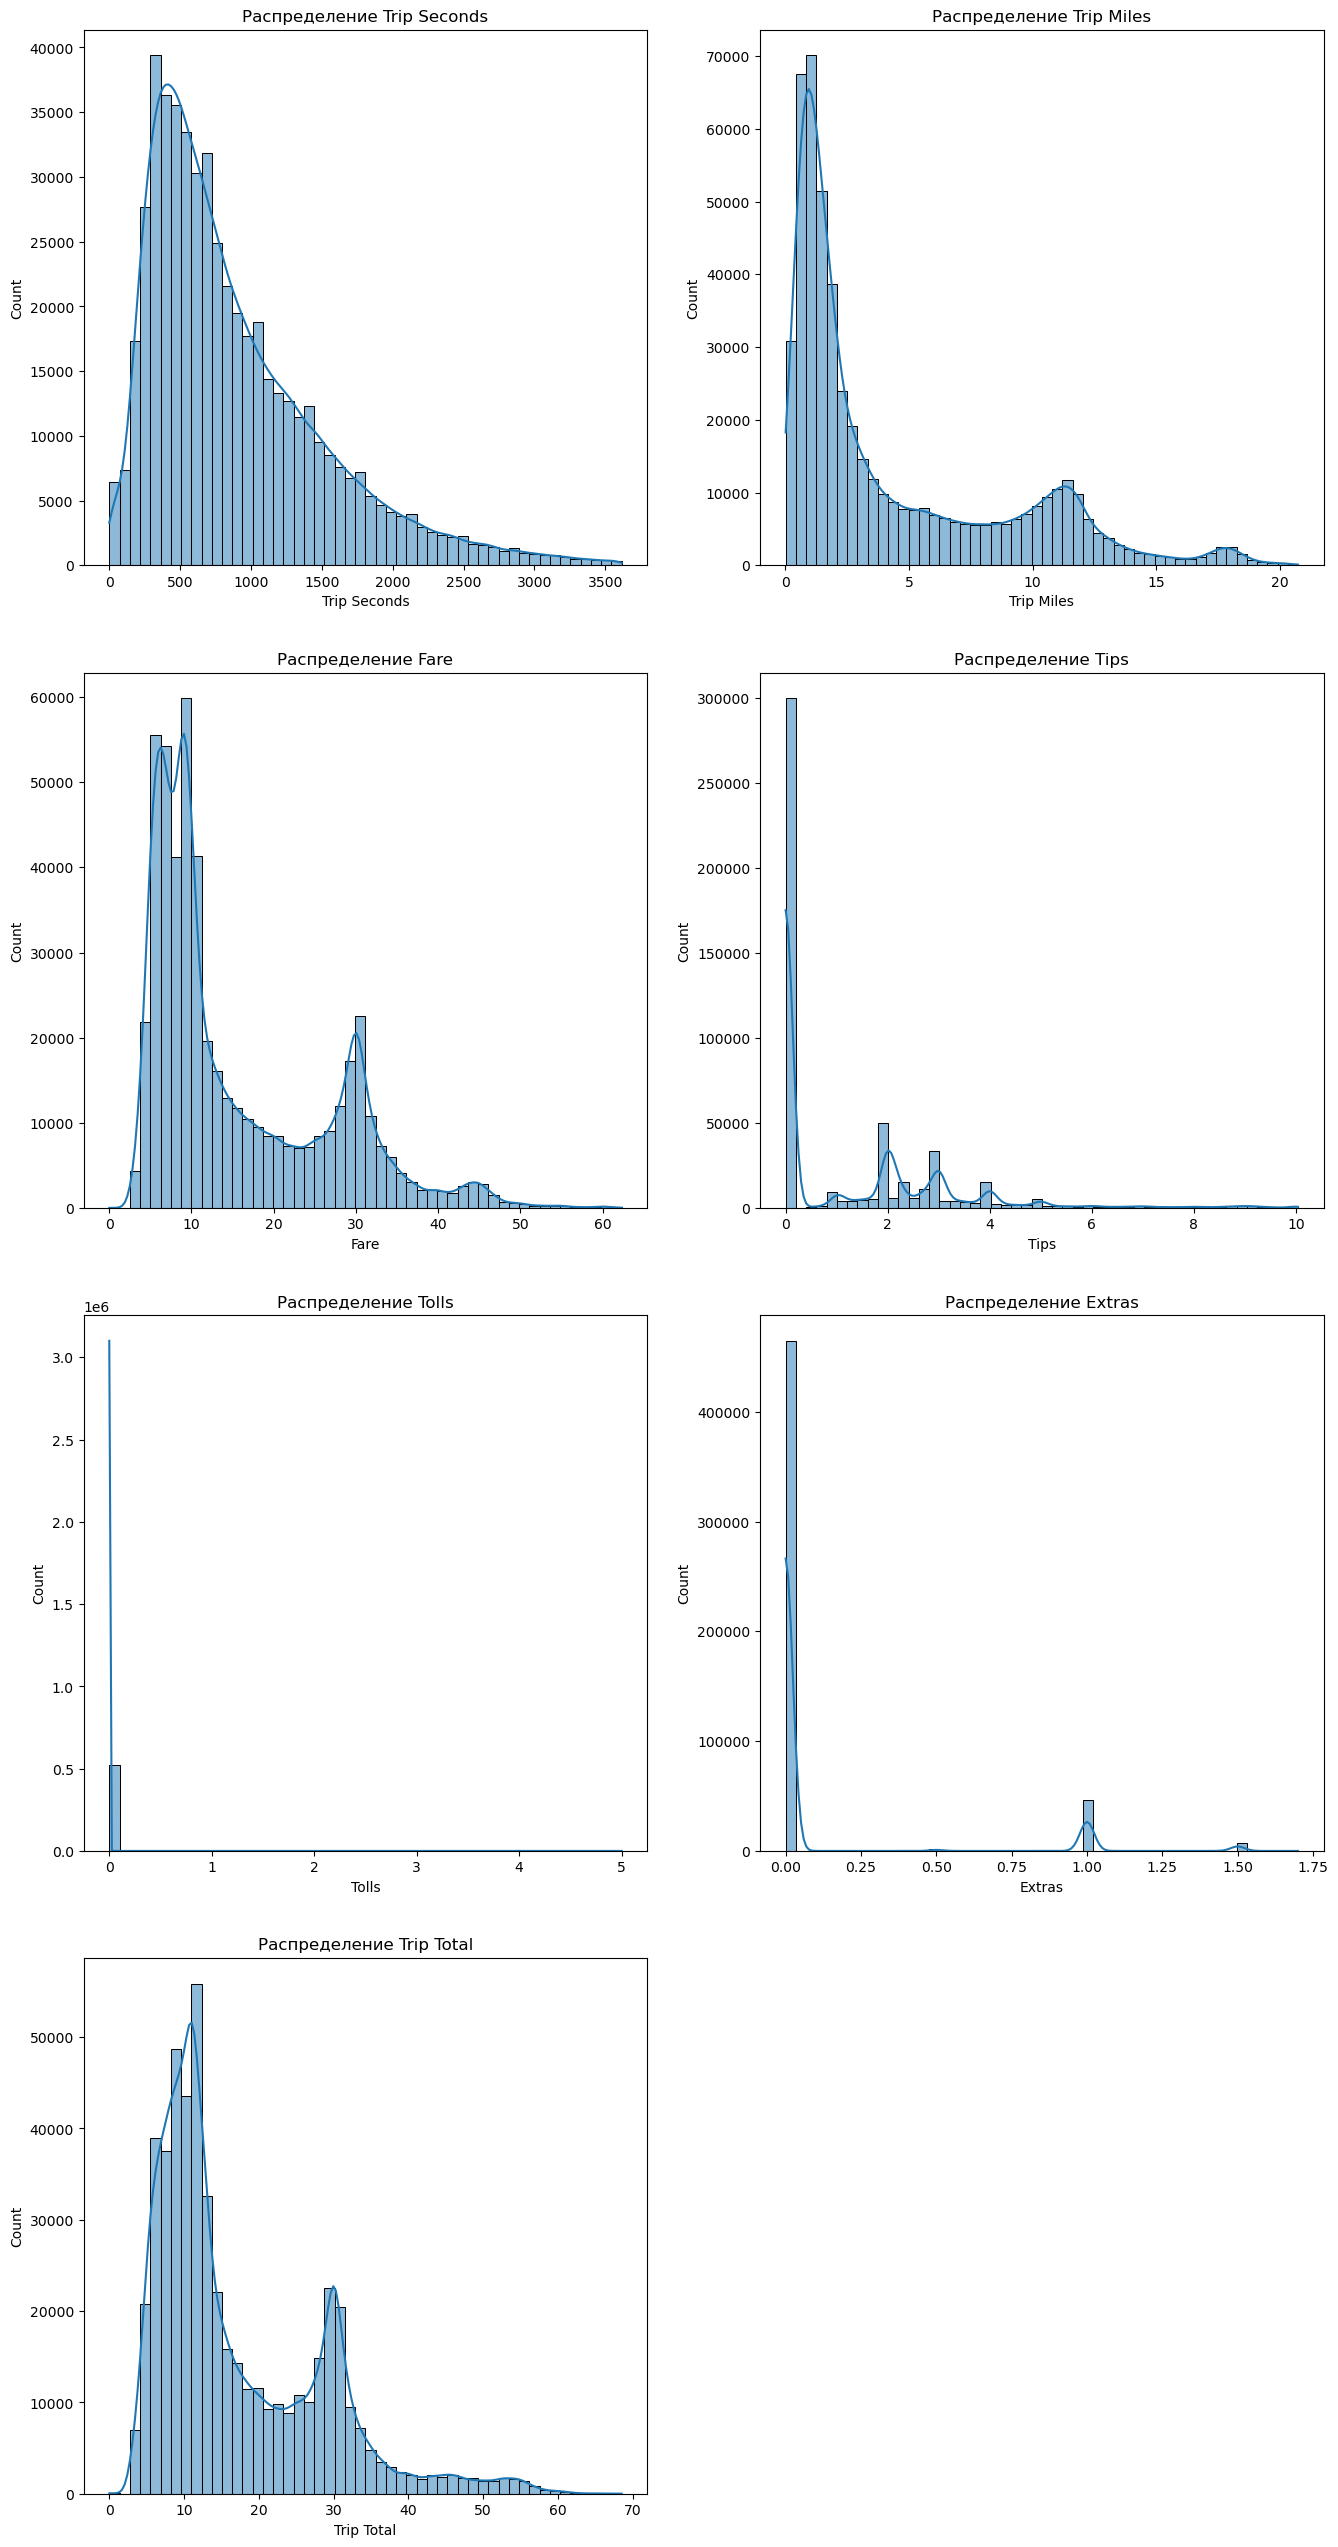

In [22]:
ncols = 2
nrows = len(features) // ncols + bool(len(features) % ncols)

plt.figure(figsize=(8 * ncols, 8 * nrows))

for id, feature in enumerate(features):
    plt.subplot(nrows, ncols, id + 1)
    sns.histplot(df_clean[conditions][feature], bins=50, kde=True)
    plt.title(f'Распределение {feature}')

plt.show()

На этом первичный поиск выбросов можно завершить. Поиск выбросов среди географических координат -- более сложная задача с анализом плотности точек на карте.

Можно перейти к последующему поиску выбросов по косвенным признакам.

### 3. Поиск выбросов по косвенным признакам.

Можно найти выбросы по дополнительным вычисленным признакам: средней скорости в пути и стоимости за милю.

Выделим временный датафрейм с примененными условиями отбора conditions.

In [23]:
tmp = df_clean[conditions].copy()

tmp['Average Speed'] = 3600 * tmp['Trip Miles'] / tmp['Trip Seconds']

median_avg_speed = tmp['Average Speed'].median()
IQR_avg_speed = tmp['Average Speed'].quantile(.75) - tmp['Average Speed'].quantile(.25)

/tmp/ipykernel_151169/1164640953.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df_clean[conditions].copy()


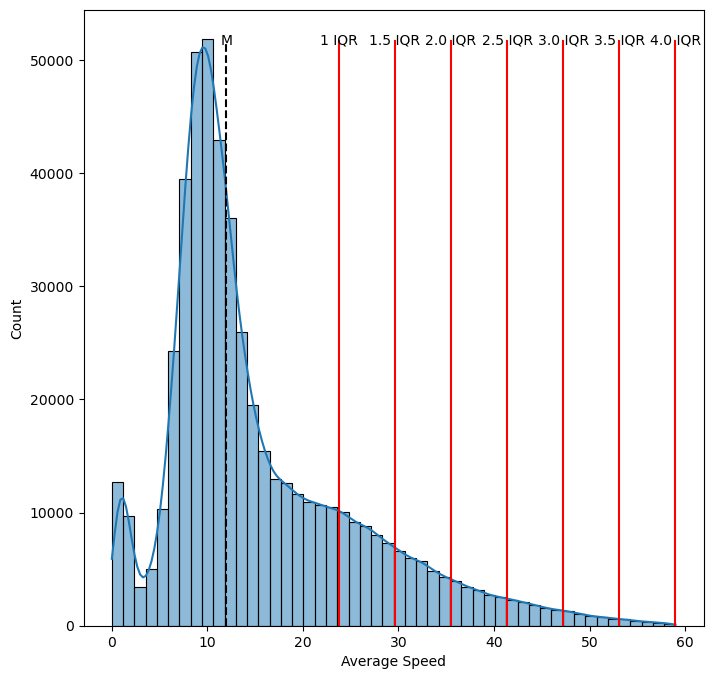

In [24]:
plt.figure(figsize=(8, 8))
axes = plt.subplot(1, 1, 1)
sns.histplot(tmp[
    (median_avg_speed - 3.0 * IQR_avg_speed < tmp['Average Speed']) & 
    (tmp['Average Speed'] < median_avg_speed + 4.0 * IQR_avg_speed)
    ]['Average Speed'], bins=50, kde=True)
plt.axvline(median_avg_speed, 0, 0.95, color='black', linestyle='--')
plt.text(median_avg_speed, 0.95 * axes.get_ylim()[1], 'M', horizontalalignment='center', verticalalignment='center')

for coeff in [1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]:
    plt.axvline(median_avg_speed + coeff * IQR_avg_speed, 0, 0.95, color='red', linestyle='-')
    plt.text(median_avg_speed + coeff * IQR_avg_speed, 0.95 * axes.get_ylim()[1], f'{coeff} IQR', horizontalalignment='center', verticalalignment='center')
    
plt.show()

Справа можно ограничить окном с тремя межквартальными расстояниями, но надо разобраться с областью вблизи нуля.

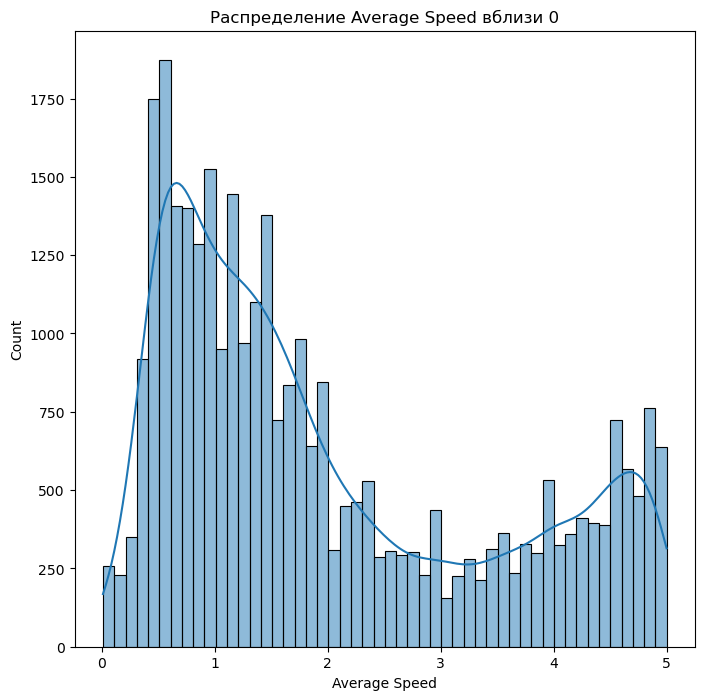

In [25]:
plt.figure(figsize=(8, 8))
sns.histplot(tmp[tmp['Average Speed'] < 5]['Average Speed'], bins=50, kde=True)
plt.title('Распределение Average Speed вблизи 0')
plt.show()

Построим совместные графики Trip Seconds и Trip Miles от Average Speed в этой области.

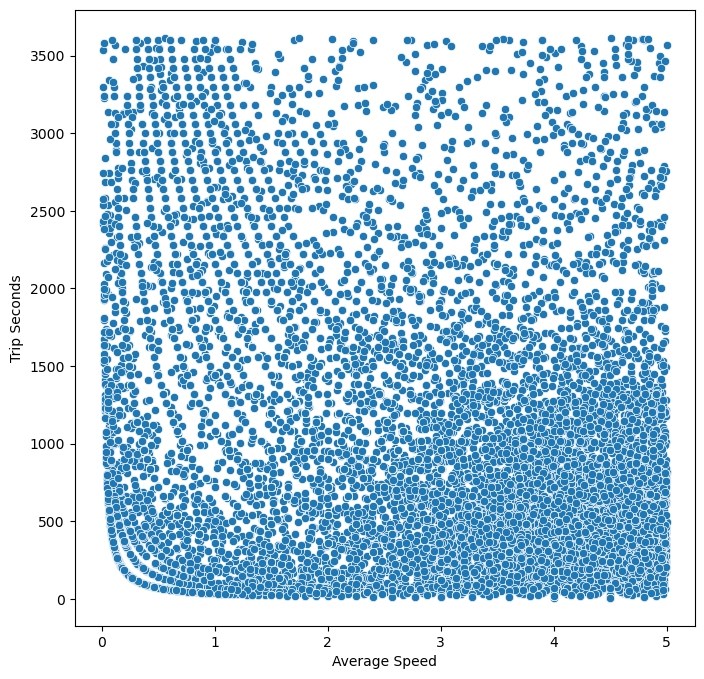

In [26]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=tmp[tmp['Average Speed'] < 5], x='Average Speed', y='Trip Seconds')

plt.show()

Обнаружен интересный эффект -- точки (=поездки) выстраиваются в линии, которые по виду очень похожи на графики обратных зависимостей $\dfrac{a}{x}$, что может указывать на некую искусственность этих данных. Займемся этим вопросом позже, а пока условие на среднюю скорость оставим в пределах $0 < \text{avg\_speed} < 4\cdot\text{IQR}$.

In [27]:
avg_speed_condition = (0 < 3600 * df_clean['Trip Miles'] / df_clean['Trip Seconds']) &\
    (3600 * df_clean['Trip Miles'] / df_clean['Trip Seconds'] < median_avg_speed + 4.0 * IQR_avg_speed)

Теперь посмотрим на показатель цены за милю.

In [28]:
tmp['Fare Per Mile'] = tmp['Fare'] / tmp['Trip Miles']

median_fare_per_mile = tmp['Fare Per Mile'].median()
IQR_fare_per_mile = tmp['Fare Per Mile'].quantile(.75) - tmp['Fare Per Mile'].quantile(.25)

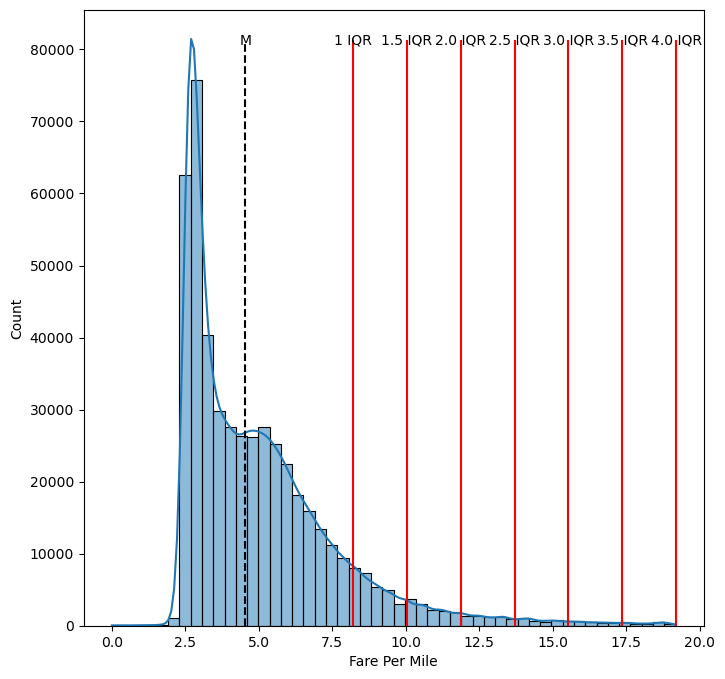

In [29]:
plt.figure(figsize=(8, 8))
axes = plt.subplot(1, 1, 1)
sns.histplot(tmp[
    (median_fare_per_mile - 3.0 * IQR_fare_per_mile < tmp['Fare Per Mile']) & 
    (tmp['Fare Per Mile'] < median_fare_per_mile + 4.0 * IQR_fare_per_mile)
    ]['Fare Per Mile'], bins=50, kde=True)
plt.axvline(median_fare_per_mile, 0, 0.95, color='black', linestyle='--')
plt.text(median_fare_per_mile, 0.95 * axes.get_ylim()[1], 'M', horizontalalignment='center', verticalalignment='center')

for coeff in [1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]:
    plt.axvline(median_fare_per_mile + coeff * IQR_fare_per_mile, 0, 0.95, color='red', linestyle='-')
    plt.text(median_fare_per_mile + coeff * IQR_fare_per_mile, 0.95 * axes.get_ylim()[1], f'{coeff} IQR', horizontalalignment='center', verticalalignment='center')
    
plt.show()

Справа можно ограничиться также четырьмя межквартильными расстояниями от медианы. Чтобы точнее найти границу слева, рассмотрим область [0, 2.5] подробнее.

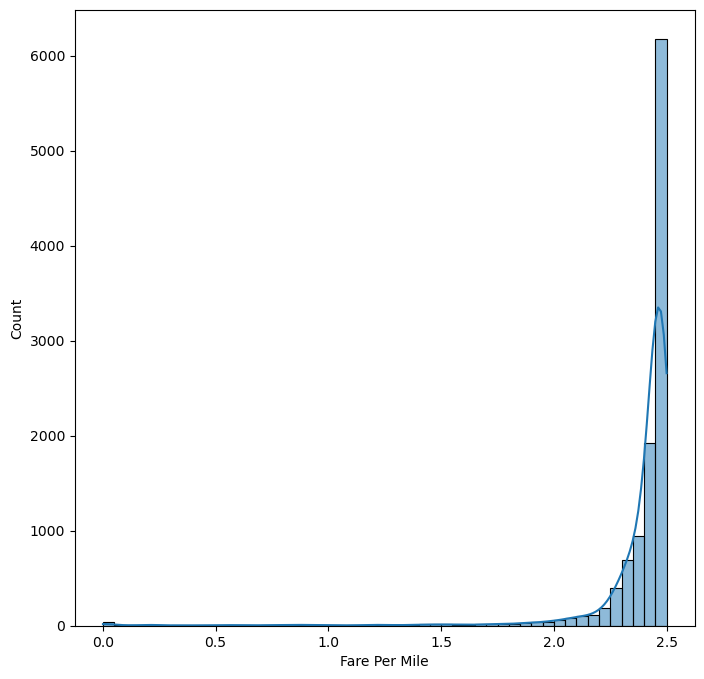

In [30]:
plt.figure(figsize=(8,8))
sns.histplot(tmp[(0<tmp['Fare Per Mile']) & (tmp['Fare Per Mile'] < 2.5)], x='Fare Per Mile', bins=50, kde=True)
plt.show()

Можно поставить ограничения $2 за милю слева. Тогда:

In [31]:
fare_per_mile_condition = (2 < df_clean['Fare'] / df['Trip Miles']) &\
(df_clean['Fare'] / df_clean['Trip Miles'] < median_fare_per_mile + 4.0 * IQR_fare_per_mile)

Trip Total не будем пересчитывать относительно миль. Оценку цены мили пути оставим в Fare Per Mile.

Осталось собрать все условия вместе и сохранить в файлы.

In [32]:
df_outliers = df_clean[~(conditions & avg_speed_condition & fare_per_mile_condition)]
df_clean = df_clean[conditions & avg_speed_condition & fare_per_mile_condition]

/tmp/ipykernel_151169/809668447.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_outliers = df_clean[~(conditions & avg_speed_condition & fare_per_mile_condition)]
/tmp/ipykernel_151169/809668447.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[conditions & avg_speed_condition & fare_per_mile_condition]


Проведем конечный осмотр распределений.

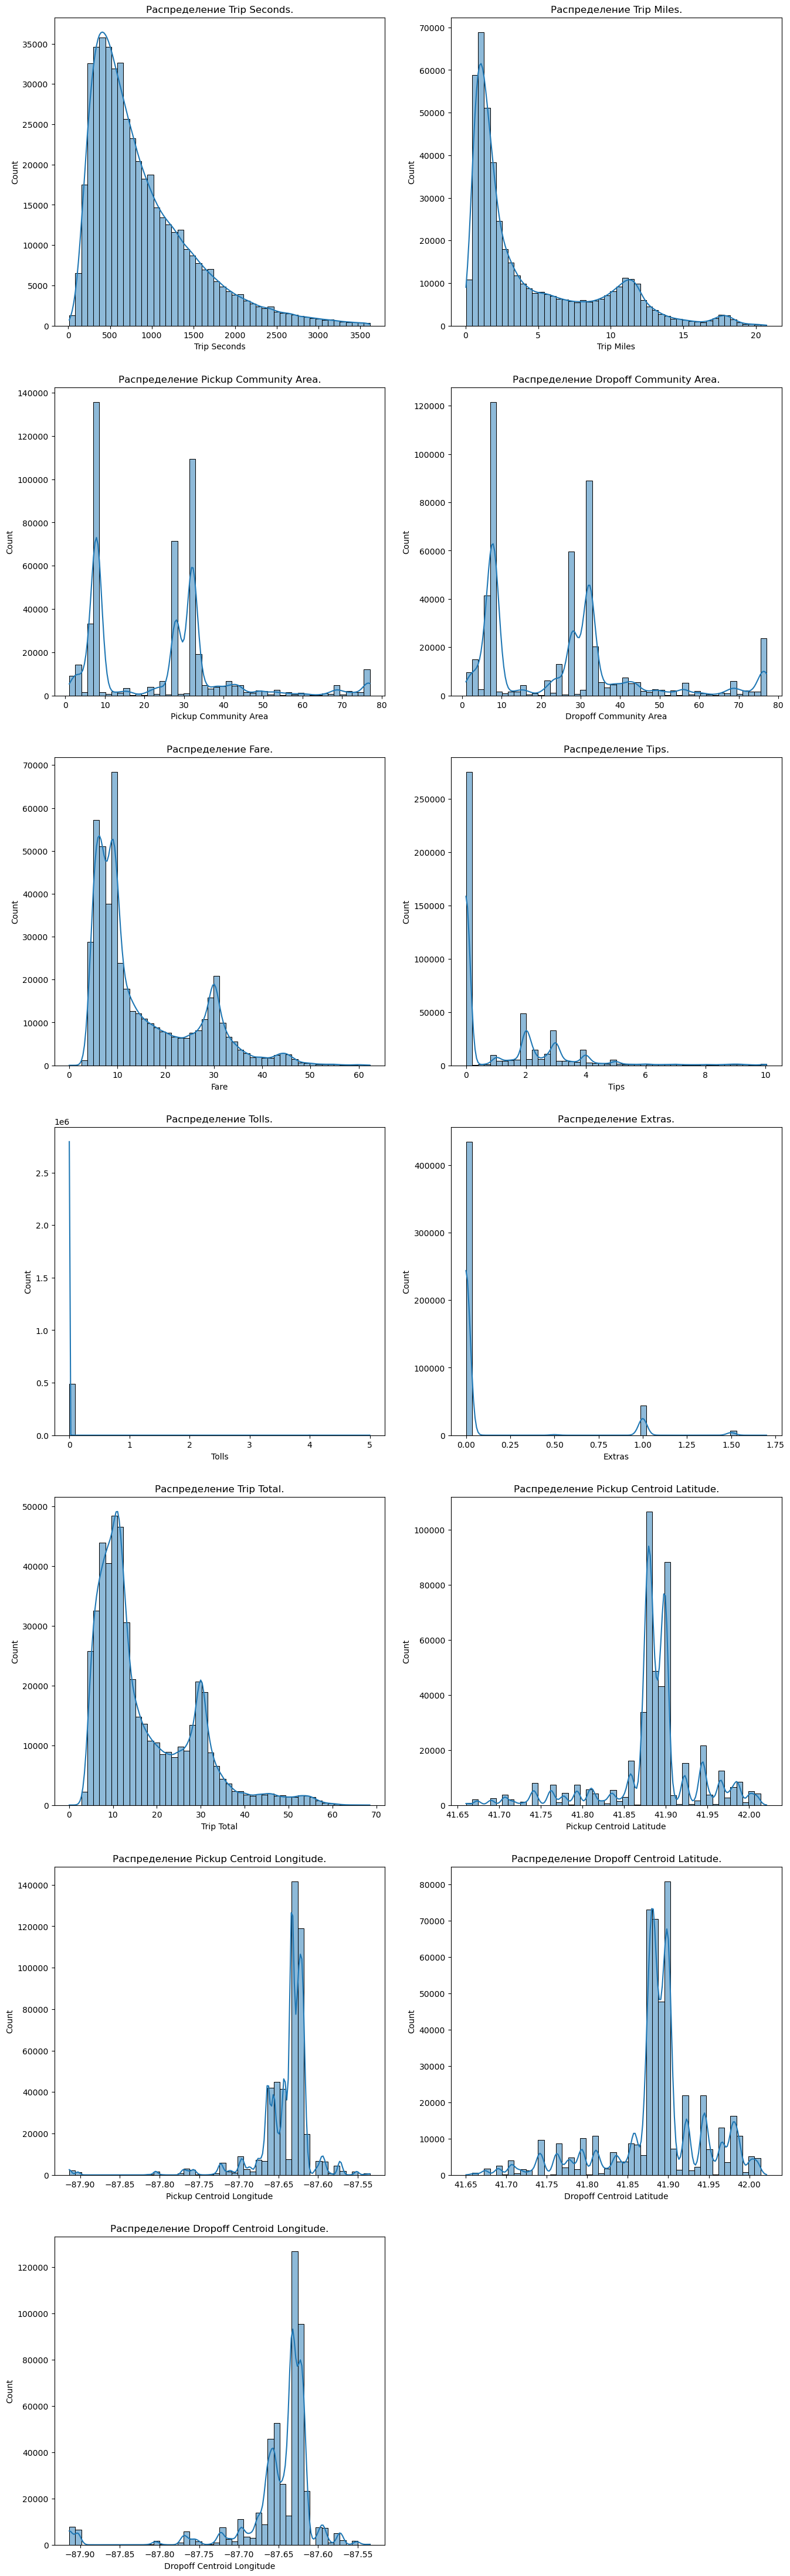

In [33]:
features = df_clean.select_dtypes(['float', 'int']).columns

ncols = 2
nrows = len(features) // ncols + bool(len(features) % ncols)

plt.figure(figsize=(8 * ncols, 8 * nrows))

for id, feature in enumerate(features):
    plt.subplot(nrows, ncols, id + 1)

    sns.histplot(df_clean[feature], bins=50, kde=True)

    plt.title(f'Распределение {feature}.')

plt.show()

Распределения выглядят удовлетворительно. Сразу же можно сделать некоторые замечания: существуют самые популярные точки как места начала и окончания поездки, причем эти популярные места совпадают, то есть есть популярный район в городе. Распределения Trip Miles, Fare и Trip Total являются бимодальными (Trip Miles имеет также третью моду, которая не выражена так ярко) -- это может косвенно говорить о популярных маршрутах с примерно одинаковой протяженностью, а значит и с примерно одинаковой стоимостью проезда. Распределение Trip Seconds в свою очередь унимодально, что вызывает некоторые вопросы.

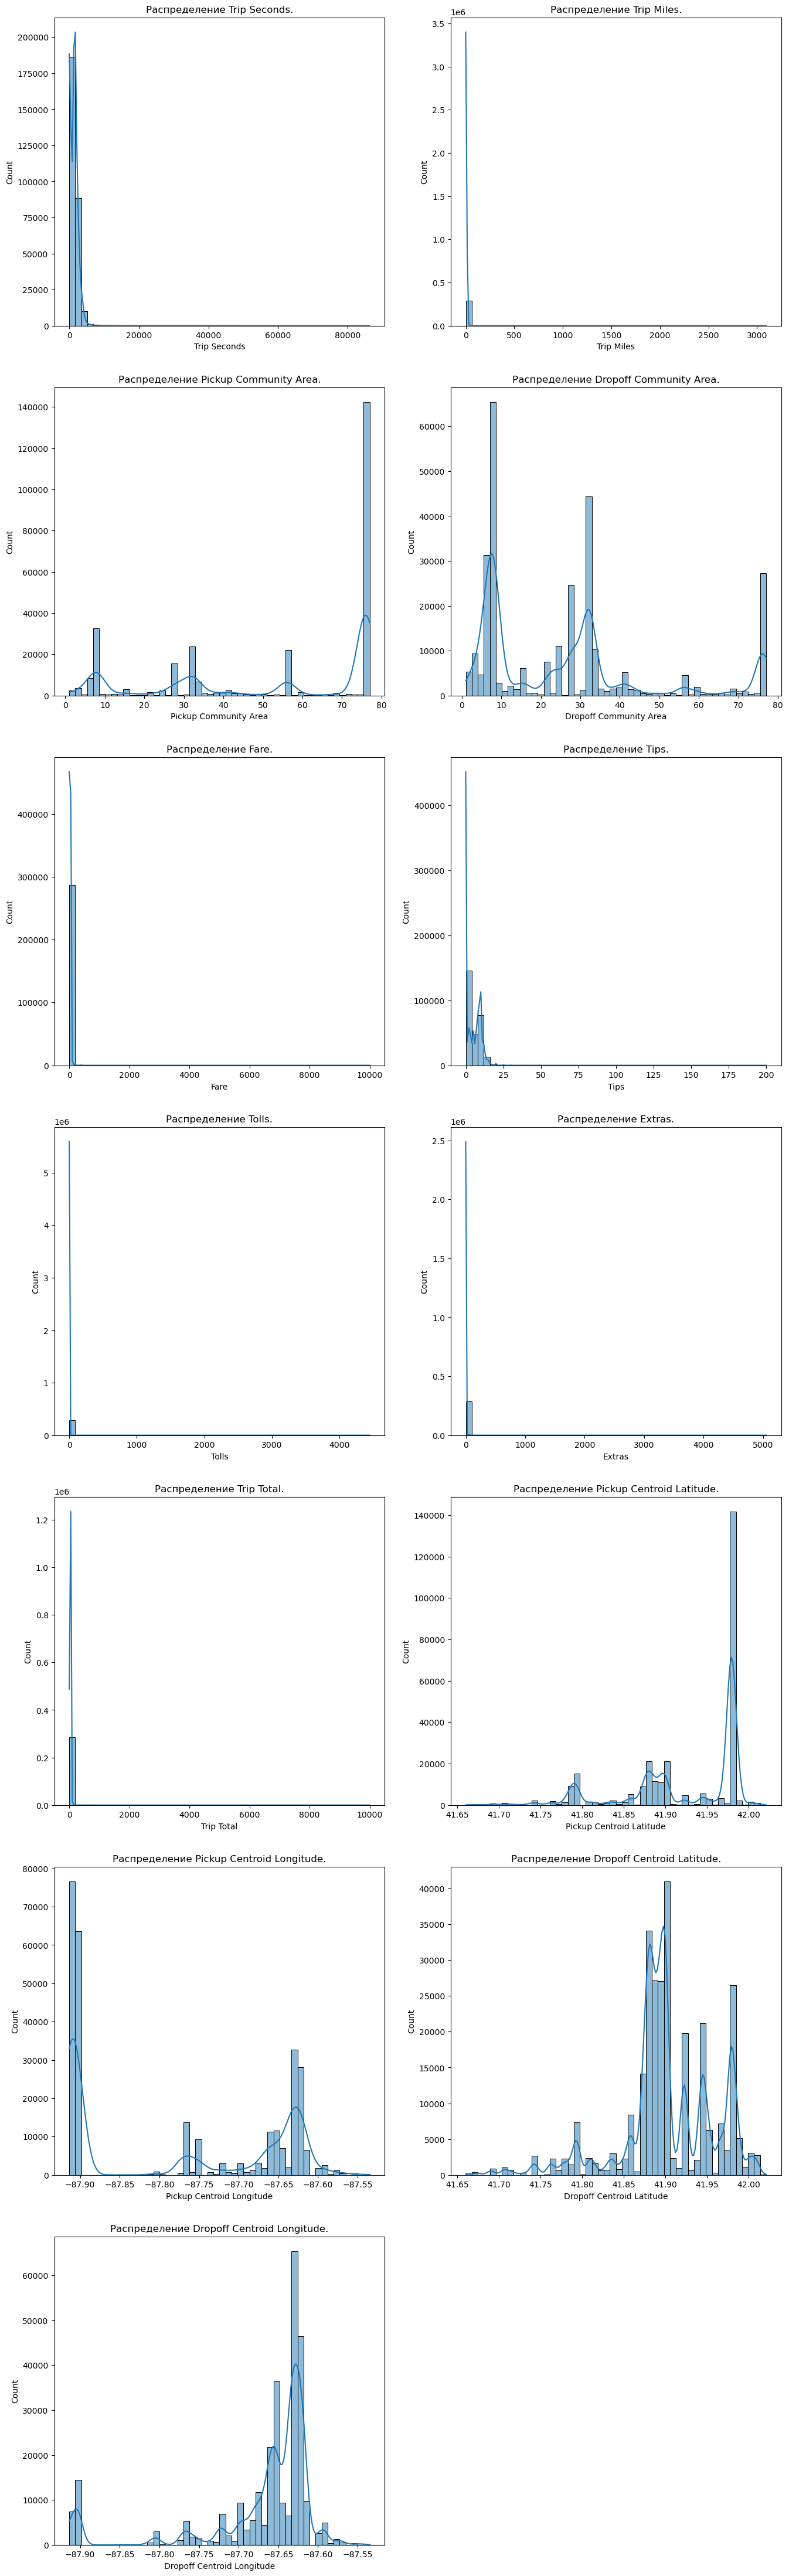

In [34]:
features = df_outliers.select_dtypes(['float', 'int']).columns

ncols = 2
nrows = len(features) // ncols + bool(len(features) % ncols)

plt.figure(figsize=(8 * ncols, 8 * nrows))

for id, feature in enumerate(features):
    plt.subplot(nrows, ncols, id + 1)

    sns.histplot(df_outliers[feature], bins=50, kde=True)

    plt.title(f'Распределение {feature}.')

plt.show()

Распределения в выбросах более сложные и обрывчатые. Вопросы, касающиеся этой части датасета скорее выражаются в поиске причин аномалий.

In [35]:
# Мощности датасетов

print(df_clean.shape[0], df_outliers.shape[0])

487239 286565


In [36]:
print(f'Выбросами обозначено {100 * df_outliers.shape[0] / df.shape[0]:.2f}% исходного датасета.')
print(f'В "чистые" данные отобрано {100 * df_clean.shape[0] / df.shape[0]:.2f}% исходного датасета.')
print(f'Как забракованные данные отброшено {100 * df_dropped.shape[0] / df.shape[0]:.2f}% исходного датасета.')

Выбросами обозначено 33.12% исходного датасета.
В "чистые" данные отобрано 56.31% исходного датасета.
Как забракованные данные отброшено 10.57% исходного датасета.


In [37]:
# Запись

df_clean.to_csv(df_clean_filename, compression='zip', index=False)
df_outliers.to_csv(df_outliers_filename, compression='zip', index=False)
df_dropped.to_csv(df_dropped_filename, compression='zip', index=False)